## Value at Risk (VaR)
VaR estimator provides us with the worst expected loss of our portfolio for a certain period with a level of confidence.

[*********************100%***********************]  6 of 6 completed


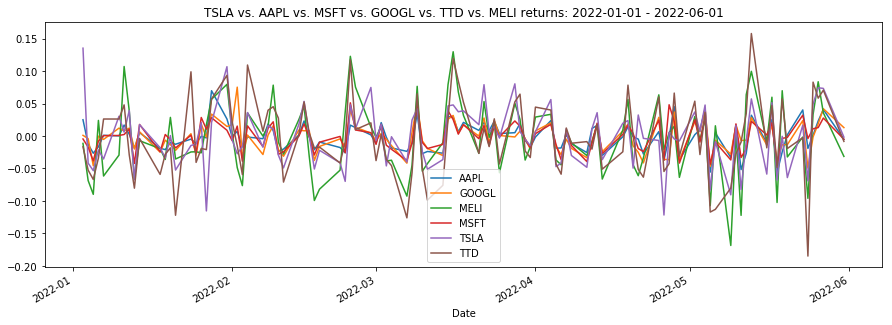

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

Risky_assets = ['TSLA','AAPL','MSFT','GOOGL','TTD','MELI']
Shares = [0,100,100,2.5,0,0]
Start_date = '2022-01-01'
End_date = '2022-06-01'
T = 1  #VaR for 1-day
No_simulations = 1000

df = yf.download(Risky_assets, start = Start_date, end = End_date, adjusted = True)

#Daily returns
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()

fig, ax = plt.subplots(figsize = (15,5))
plot_title = f'{" vs. ".join(Risky_assets)} returns: {Start_date} - {End_date}'

returns.plot(title = plot_title, ax =ax)

In [19]:
# Covariance matrix
cov_mat = returns.cov()

# Applied Cholesky decomposition for covariance matrix
# this function returns the upper triangular maxtrix

chol_mat = np.linalg.cholesky(cov_mat)

# Draw correlated random numbers from standard normal distritution
# We says "correlated" because these 3 assests are all belong to advertising sector

rv = np.random.normal(size = (No_simulations, len(Risky_assets)))
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv)))

# Parameters
mu = np.mean(returns, axis=0).values
sigma = np.std(returns, axis=0).values
S_0 = adj_close.values[-1, :]
P_0 = np.sum(Shares * S_0)

# Portfolio valuation at the next-day using Geometric Brownian Motion analytical solution to simulate 
S_T = S_0 * np.exp((mu - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * correlated_rv)
P_T = np.sum(Shares * S_T, axis=1)

# Portfolio return
P_return = P_T - P_0

# We sort those returns from low to high in order to take ith quantile
P_return_sorted = np.sort(P_return)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_return_sorted, percentiles)

for x, y in zip(percentiles, var):
    print(f'1-day VaR with {100-x}% confidence: {-y:.2f}$')

1-day VaR with 99.99% confidence: 1198.51$
1-day VaR with 99.9% confidence: 1088.35$
1-day VaR with 99.0% confidence: 969.51$


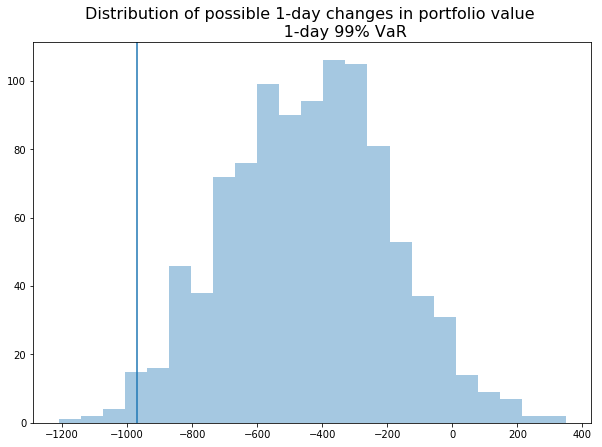

In [20]:
# Plotting the 1% percentile which is also the VaR
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.distplot(P_return, kde=False)
ax.set_title('''Distribution of possible 1-day changes in portfolio value 
             1-day 99% VaR''', fontsize=16)
ax.axvline(var[2], 0, 10000)
plt.show()

## Expected Shortfall
Expected shortfall is the expected loss when the loss higher than our VaR. Expected shortfall is usually very large.

In [21]:
# Expected shortfall for Confident level of 99%
var = np.percentile(P_return_sorted, 1.)
expected_shortfall = P_return_sorted[P_return_sorted <= var].mean()

print(f'The 1-day 99% VaR is {-var:.2f}$, and the corresponding Expected Shortfall is {-expected_shortfall:.2f}$.')

The 1-day 99% VaR is 969.51$, and the corresponding Expected Shortfall is 1051.22$.
